In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import math

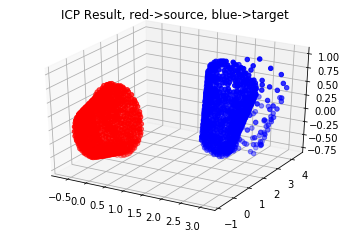

In [9]:
# reading data
target = np.load('pc1.npy')
source = np.load('pc2.npy')
# Showing data
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_title('ICP Result, red->source, blue->target')
ax.scatter(target[:, 0], target[:, 1], target[:, 2], c='b')
ax.scatter(source[:, 0], source[:, 1], source[:, 2], c='r')
plt.show()

In [3]:
def find_nearest_points(a, b):
#     finding the point in b with min distance from points of a
    result = a.copy()
    for i in range(a.shape[0]):
        least_distance = math.inf
        for j in range(b.shape[0]):
            distance = np.linalg.norm(a[i, :] - b[j, :])
            if distance < least_distance:
                least_distance = distance
                result[i, :] = b[j, :]
    return result

In [4]:
# ICP
match = source.copy()
for i in range(30):
    correspondence = find_nearest_points(match, target)
    match_centroid = sum(match) / match.shape[0]
    correspondence_centroid = sum(correspondence) / correspondence.shape[0]
#     SVD of normalized pointclouds due to mean
    U, _, VT = np.linalg.svd(np.matmul((match - match_centroid).T, correspondence - correspondence_centroid))
    R = np.matmul(VT.T, U.T)
    for j in range(match.shape[0]):
#         Rotating and Translating points according to match and correspondences, slide 139 of Section12
        match[j, :] = correspondence_centroid + np.matmul(R, match[j, :] - match_centroid)

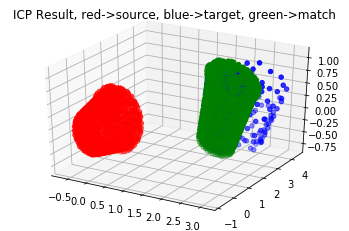

In [5]:
# Showing ICP result
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_title('ICP Result, red->source, blue->target, green->match')
ax.scatter(match[:, 0], match[:, 1], match[:, 2], c='g')
ax.scatter(target[:, 0], target[:, 1], target[:, 2], c='b')
ax.scatter(source[:, 0], source[:, 1], source[:, 2], c='r')
plt.show()
# Many blue points have been covered by green noes which makes a good match

In [7]:
# PCA
match = source.copy()
source_pca = PCA(n_components=3).fit(source)
target_pca = PCA(n_components=3).fit(target)
source_centroid = sum(source) / source.shape[0]
target_centroid = sum(target) / target.shape[0]
source_eigenvectors = source_pca.components_
target_eigenvectors = target_pca.components_
# Eigenvectors correspond to the rotation around standard axes
# Multiplying one by transpose of the other yields the rotation needed for the two (Searching over +1 or -1 multpiplication for directions)
R = np.matmul(target_eigenvectors, -1 * source_eigenvectors.T)
for i in range(match.shape[0]):
#     Rotating and Translating points according to match and correspondences, slide 137 of Section12
    match[i, :] = target_centroid + np.matmul(R, source[i, :] - source_centroid)

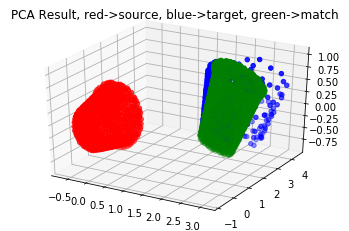

In [8]:
# Showing ICP result
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_title('PCA Result, red->source, blue->target, green->match')
ax.scatter(match[:, 0], match[:, 1], match[:, 2], c='g')
ax.scatter(target[:, 0], target[:, 1], target[:, 2], c='b')
ax.scatter(source[:, 0], source[:, 1], source[:, 2], c='r')
plt.show()

In [ ]:
# ICP has a better performance in matching as seen above